In [1]:
import numpy
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier

# Import the data
allData = pandas.read_csv('../input/mobile-price-classification/train.csv', sep=',')

# Names of the features
features = list(allData.columns)

# Separate the features/attributes from the target
featuresData = allData.values[:, :19]
targetData = allData.values[:, 20]



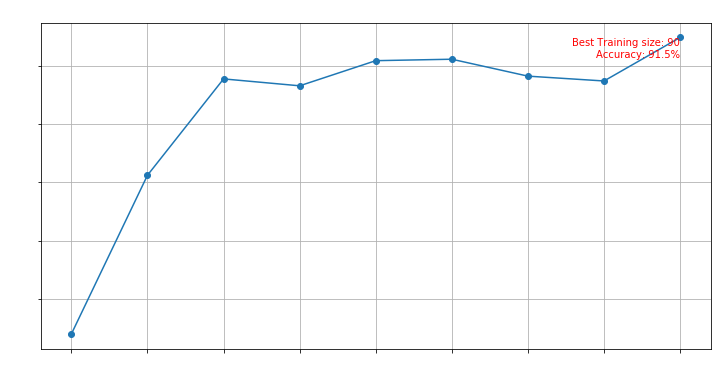

In [2]:
'''EVALUATE & ANALYZE BASED ON DEFAULT PARAMS AND VALUES & ONLY TRAINING SET AND TESTING SET'''
# Split the data - training set and testing set (for generalization)
# featuresWholeTrainingSet, featuresTestingSet, targetsWholeTrainingSet, targetsTestingSet = train_test_split(featuresData, targetData, test_size=0.2, random_state=1234)

'''LEARNING CURVE: Default KNN Classifier'''
# A dataframe keeping track of the progress and for plotting later
dataFrameT = pandas.DataFrame(columns=['Training Size', 'Accuracy'])
# Keep track of the best training size
bestTrainingSize = 0
# Keep track of the highest accuracy
highestAccuracy = 0.0
# Incease the training size from 10 to 90 percent of the whole set's size; train the model; check its accuracy; save to plot later
for size in range(1, 10):
    # Split the data - training set and testing set (for generalization)
    featuresWholeTrainingSet, featuresTestingSet, targetsWholeTrainingSet, targetsTestingSet = train_test_split(featuresData, targetData, train_size=size/10, random_state=1234)
    
    # Create model
    model = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30)
    # Train the model
    model.fit(featuresWholeTrainingSet, targetsWholeTrainingSet)
    # Have the model make a prediction
    modelPrediction = model.predict(featuresTestingSet)
    # Determine the model's accuracy on the validation set
    modelAccuracy = accuracy_score(targetsTestingSet, modelPrediction)*100
    # Save the data to plot later
    trainingSize = size*10
    dataFrameT = dataFrameT.append({'Training Size': trainingSize, 'Accuracy': modelAccuracy}, ignore_index=True)
    
    # Save the highest accuracy based on the training size
    if modelAccuracy >= highestAccuracy:
        bestTrainingSize = trainingSize
        highestAccuracy = modelAccuracy
        
plot.figure(figsize=(12, 6))
plot.xlabel('Training Size', color='white')
plot.ylabel('Accuracy %', color='white')
plot.title("LEARNING CURVE: Default KNN Classifier - Training & Test sets", color='white')
plot.xticks(color='white')
plot.yticks(color='white')
plot.plot('Training Size', 'Accuracy', data=dataFrameT, marker='o')
plot.text(bestTrainingSize, highestAccuracy, "Best Training size: {}\nAccuracy: {}%".format(bestTrainingSize, highestAccuracy), horizontalalignment='right', verticalalignment='top', color='red')
plot.grid()

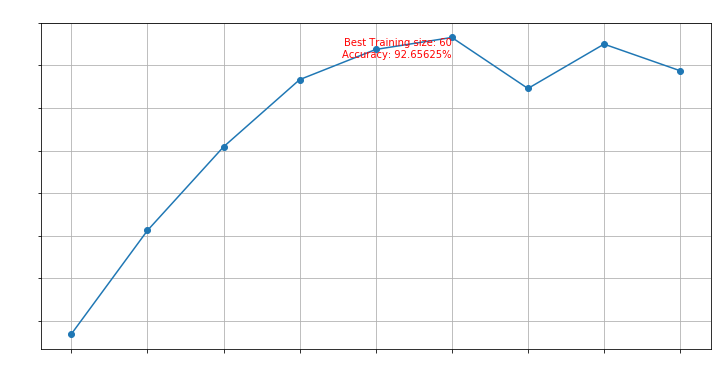

In [3]:
'''EVALUATE DEFAULT PARAMS ON TRAINING VS VALIDATION SET'''
# Split the data - training set and testing set (for generalization)
featuresWholeTrainingSet, featuresTestingSet, targetsWholeTrainingSet, targetsTestingSet = train_test_split(featuresData, targetData, test_size=0.2, random_state=1234)

'''LEARNING CURVE: Default KNN Classifier'''
# A dataframe keeping track of the progress and for plotting later
dataFrameV = pandas.DataFrame(columns=['Training Size', 'Accuracy'])
# Keep track of the best training size
bestTrainingSize = 0
# Keep track of the highest accuracy
highestAccuracy = 0.0
# Incease the training size from 10 to 90 percent of the whole set's size; train the model; check its accuracy; save to plot later
for size in range(1, 10):
    # Split the training set above into 2 sets: smaller training set and a validation set
    featuresTrainingSet, featuresValidationSet, targetTrainingSet, targetValidationSet = train_test_split(featuresWholeTrainingSet, targetsWholeTrainingSet, train_size=size/10, random_state=1234)
    
    # Create model
    model = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30)
    # Train the model
    model.fit(featuresTrainingSet, targetTrainingSet)
    # Have the model make a prediction
    modelPrediction = model.predict(featuresValidationSet)
    # Determine the model's accuracy on the validation set
    modelAccuracy = accuracy_score(targetValidationSet, modelPrediction)*100
    # Save the data to plot later
    trainingSize = size*10
    dataFrameV = dataFrameV.append({'Training Size': trainingSize, 'Accuracy': modelAccuracy}, ignore_index=True)
    
    # Save the highest accuracy based on the training size
    if modelAccuracy >= highestAccuracy:
        bestTrainingSize = trainingSize
        highestAccuracy = modelAccuracy
        
plot.figure(figsize=(12, 6))
plot.xlabel('Training Size', color='white')
plot.ylabel('Accuracy %', color='white')
plot.title("LEARNING CURVE: Default KNN Classifier - Training & Validation sets", color='white')
plot.xticks(color='white')
plot.yticks(color='white')
plot.plot('Training Size', 'Accuracy', data=dataFrameV, marker='o')
plot.text(bestTrainingSize, highestAccuracy, "Best Training size: {}\nAccuracy: {}%".format(bestTrainingSize, highestAccuracy), horizontalalignment='right', verticalalignment='top', color='red')
plot.grid()

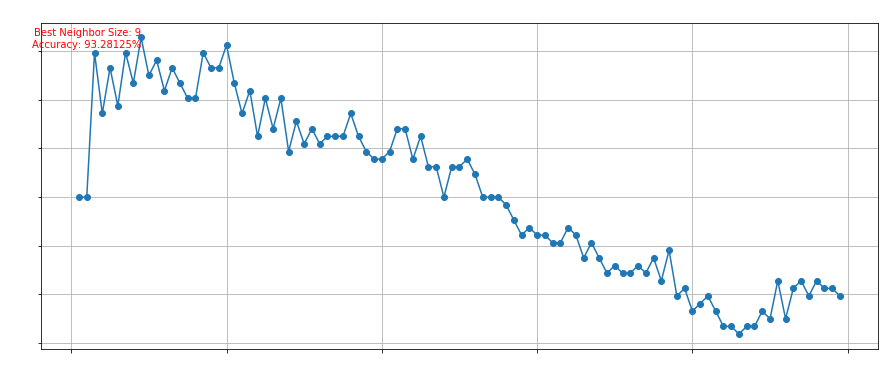

In [4]:
'''LEARNING CURVE: KNN Classifier Range of n_neighbors Param'''
# A dataframe keeping track of the progress and for plotting later
dataFrameNN = pandas.DataFrame(columns=['n_neighbors', 'Accuracy'])
# The range
neighborRange = list(range(1,100))
# The best value
bestNeighborSize = -1
# The highest accuracy
highestAccuracy = 0.0
# Split the training set above into 2 sets: 60% training set and 40% validation set
featuresTrainingSet, featuresValidationSet, targetTrainingSet, targetValidationSet = train_test_split(featuresWholeTrainingSet, targetsWholeTrainingSet, train_size=0.6, random_state=1234)
# Iterate through the range of values for parameter max_depth
for neighValue in neighborRange:
    # Create the classifier with the current ranged-value and all other params set to default
    model = KNeighborsClassifier(n_neighbors=neighValue)                                                           
    # Train the model
    model.fit(featuresTrainingSet, targetTrainingSet)    
    # Base on what the model has learned set it to predict the outcome of the validation set
    modelPrediction = model.predict(featuresValidationSet)
    # Determine the model's accuracy on the validation set
    modelAccuracy = accuracy_score(targetValidationSet, modelPrediction)*100
    # Save the data and plot later
    dataFrameNN = dataFrameNN.append({'n_neighbors':neighValue, 'Accuracy':modelAccuracy}, ignore_index=True)
    
    # Save the highest accuracy based on the training size
    if modelAccuracy > highestAccuracy:
        bestNeighborSize = neighValue
        highestAccuracy = modelAccuracy
        
plot.figure(figsize=(15, 6))
plot.xlabel('# - Nearest Neighbor', color='white')
plot.ylabel('Accuracy %', color='white')
plot.title("LEARNING CURVE: KNN Classifier Range of n_neighbors Param", color='white')
plot.xticks(color='white')
plot.yticks(color='white')
plot.plot('n_neighbors', 'Accuracy', data=dataFrameNN, marker='o')
plot.text(bestNeighborSize, highestAccuracy, "Best Neighbor Size: {}\nAccuracy: {}%".format(bestNeighborSize, highestAccuracy), horizontalalignment='right', verticalalignment='center_baseline', color='red')
plot.grid()

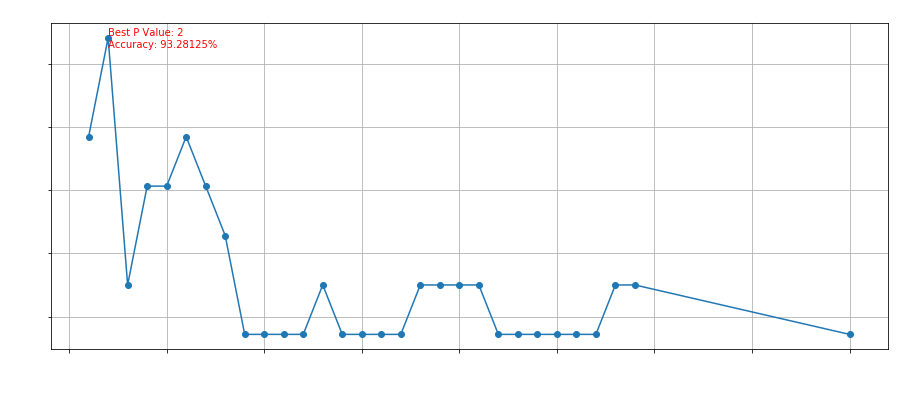

In [5]:
'''LEARNING CURVE: KNN Classifier Range of metric Param'''
# A dataframe keeping track of the progress and for plotting later
dataFrameP = pandas.DataFrame(columns=['metric', 'Accuracy'])
# Split the training set above into 2 sets: 60% training set and 40% validation set
featuresTrainingSet, featuresValidationSet, targetTrainingSet, targetValidationSet = train_test_split(featuresWholeTrainingSet, targetsWholeTrainingSet, train_size=0.6, random_state=1234)
# The highest accuracy
highestAccuracy = 0.0
# The best value
bestP = -1
# First run p=range(1,16) on the minkowski distance equation for determining neighbor distances, where 1=manhattan distance & 2=euclidean distance
for p in range(1,30):
    # Create the classifier with the current ranged-value and all other params set to default
    model = KNeighborsClassifier(n_neighbors=9, p=p)                                                           
    # Train the model
    model.fit(featuresTrainingSet, targetTrainingSet)    
    # Base on what the model has learned set it to predict the outcome of the validation set
    modelPrediction = model.predict(featuresValidationSet)
    # Determine the model's accuracy on the validation set
    modelAccuracy = accuracy_score(targetValidationSet, modelPrediction)*100
    # Save the data and plot later
    dataFrameP = dataFrameP.append({'metric':p, 'Accuracy':modelAccuracy}, ignore_index=True)
    
    # Save the highest accuracy based on the training size
    if modelAccuracy > highestAccuracy:
        bestP = p
        highestAccuracy = modelAccuracy
        
'''One last go for the 'chebyshev' distance equation'''        
# Create the classifier
model = KNeighborsClassifier(n_neighbors=9, metric='chebyshev')                                                           
# Train the model
model.fit(featuresTrainingSet, targetTrainingSet)    
# Base on what the model has learned set it to predict the outcome of the validation set
modelPrediction = model.predict(featuresValidationSet)
# Determine the model's accuracy on the validation set
modelAccuracy = accuracy_score(targetValidationSet, modelPrediction)*100
# Save the data and plot later
dataFrameP = dataFrameP.append({'metric':40, 'Accuracy':modelAccuracy}, ignore_index=True)

# Save the highest accuracy based on the training size
if modelAccuracy > highestAccuracy:
    bestP = p
    highestAccuracy = modelAccuracy
        
plot.figure(figsize=(15, 6))
plot.xlabel('Distance Equation\np=1=manhattan, p=2=euclidean, p=3->30=minkowski for diff values of p, & p=40=chebyshev', color='white')
plot.ylabel('Accuracy %', color='white')
plot.title("LEARNING CURVE: KNN Classifier Range of metric Param", color='white')
plot.xticks(color='white')
plot.yticks(color='white')
plot.plot('metric', 'Accuracy', data=dataFrameP, marker='o')
plot.text(bestP, highestAccuracy, "Best P Value: {}\nAccuracy: {}%".format(bestP, highestAccuracy), horizontalalignment='left', verticalalignment='center_baseline', color='red')
plot.grid()

In [6]:
'''RUN THE BEST PARAMETER VALUES ON THE TEST SET'''   
# Split the data - training set and testing set (for generalization)
featuresWholeTrainingSet, featuresTestingSet, targetsWholeTrainingSet, targetsTestingSet = train_test_split(featuresData, targetData, test_size=0.2, random_state=1234)
# Split the training set above into 2 sets: 60% training set and 40% validation set
featuresTrainingSet, featuresValidationSet, targetTrainingSet, targetValidationSet = train_test_split(featuresWholeTrainingSet, targetsWholeTrainingSet, train_size=0.6, random_state=1234)
# Create the classifier
model = KNeighborsClassifier(metric='euclidean', n_neighbors=9)                                                           
# Train the model
model.fit(featuresTrainingSet, targetTrainingSet)    
# Base on what the model has learned set it to predict the outcome of the test set
modelPrediction = model.predict(featuresTestingSet)
# Determine the model's accuracy on the test set
modelAccuracy = accuracy_score(targetsTestingSet, modelPrediction)*100
print("Final Model Accuracy on Test set: {}%".format(modelAccuracy))
print("Since lower than previous eval of 93.28% on trg/val training this implies Overfitting to the training")

Final Model Accuracy on Test set: 90.75%
Since lower than previous eval of 93.28% on trg/val training this implies Overfitting to the training


In [7]:
'''USE CROSS VALIDATION'''
from sklearn.model_selection import cross_validate
# Optimal identified params
model = KNeighborsClassifier(metric='euclidean', n_neighbors=9)
# cross_val_score will split the training data for me - in this case 4 sets
crossVal = cross_validate(model,featuresWholeTrainingSet, targetsWholeTrainingSet, cv=4, scoring='accuracy', return_estimator=True)
print("The accuracy scores of the 4 models under cross-validation: {}".format(list(crossVal['test_score'])))
# Get the classifier that did the best
scores = list(crossVal['test_score'])
index = scores.index(max(scores))
bestModel = crossVal['estimator'][index]
print("Best Model's accuracy using cross-validation: {0:.2f}%".format(scores[index]*100))

'''NOW RUN ON TEST DATASET'''
# Base on what the model has learned set it to predict the outcome of the TEST set
bestModelPrediction = bestModel.predict(featuresTestingSet)
# Determine the model's accuracy on the TEST set
modelAccuracy = accuracy_score(targetsTestingSet, bestModelPrediction)*100
print("Best Model's accuracy against Test Dataset: {0:.2f}%".format(modelAccuracy))

The accuracy scores of the 4 models under cross-validation: [0.9427860696517413, 0.9226932668329177, 0.9223057644110275, 0.9045226130653267]
Best Model's accuracy using cross-validation: 94.28%
Best Model's accuracy against Test Dataset: 91.50%


In [8]:
'''USE GRIDSEARCH AND CROSS-VALIDATION SIMULTANEOUSLY'''
from sklearn.model_selection import GridSearchCV
tuneParameters = [{'n_neighbors': list(range(2,22)), 'metric': ['euclidean']}]
# What metric are you after https://slack-redir.net/link?url=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fmodel_evaluation.html%23scoring-parameter
# score = ['accuracy']
# Get the model with the tuned hyperparameters
model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=tuneParameters, scoring='accuracy', cv=4, refit=True)
# Train the model
model.fit(featuresTrainingSet, targetTrainingSet)
print("Best parameters: {}".format(model.best_params_))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5}


In [9]:
bestN_neighbors = model.best_params_['n_neighbors']
# Create the classifier
model = KNeighborsClassifier(metric='euclidean', n_neighbors=bestN_neighbors)                                                           
# Train the model
model.fit(featuresTrainingSet, targetTrainingSet)    
# Base on what the model has learned set it to predict the outcome of the test set
modelPrediction = model.predict(featuresTestingSet)
# Determine the model's accuracy on the test set
modelAccuracy = accuracy_score(targetsTestingSet, modelPrediction)*100
print("Model accuracy after cross-validation: {}%".format(modelAccuracy))

Model accuracy after cross-validation: 90.5%
